In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"H:\My Drive\Intership Docs\Climate_NASA\climate_nasa.csv")
data

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."
...,...,...,...,...,...
517,2022-12-22T17:21:37.000Z,0,9e17b1a6422032d47472f0216c73aafda7587e302eed5e...,NaN,One can only hope for a peak 😞
518,2022-12-22T17:19:51.000Z,1,48e55d898603a136aefc44771f248bffd67242583a462a...,5.0,what is the error margin for the temperature e...
519,2022-12-22T17:12:57.000Z,3,ca5d2611814cf8c9844ed06d9916d876d2dba94dac5ff2...,NaN,We all should volenteerly help in reducing Glo...
520,2022-12-22T17:01:12.000Z,1,a87c8aea74c9b97002b368d6143ce9c2809dcaec3103fb...,NaN,Sergio Yepes


In [2]:
data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [3]:
data.isnull().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [4]:
data.duplicated().sum()


0

In [5]:
data.nunique()

date             522
likesCount        41
profileName      483
commentsCount     39
text             503
dtype: int64

In [6]:
data.dtypes

date              object
likesCount         int64
profileName       object
commentsCount    float64
text              object
dtype: object

In [7]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')

In [8]:
data.dtypes

date             datetime64[ns, UTC]
likesCount                     int64
profileName                   object
commentsCount                float64
text                          object
dtype: object

In [9]:
from sklearn.impute import SimpleImputer
a = SimpleImputer(missing_values = np.nan, strategy = "mean")
data['commentsCount'] = a.fit_transform(data[['commentsCount']])
data['commentsCount'].isna().sum()


0

In [10]:
from sklearn.impute import SimpleImputer
a = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
data['text'] = a.fit_transform(data[['text']]).ravel()
data['text'].isna().sum()

0

In [11]:
data.isnull().sum()

date             0
likesCount       0
profileName      0
commentsCount    0
text             0
dtype: int64

In [12]:
Q1 = data['likesCount'].quantile(0.25)
Q3 = data['likesCount'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 values:", Q1)
print("Q3 values:", Q3)
print("IQR values:", IQR)

Q1 values: 0.0
Q3 values: 4.0
IQR values: 4.0


In [13]:
lower_limit = Q1 - 1.5 * (IQR)
upper_limit = Q3 + 1.5 * (IQR)
print(lower_limit)
print(upper_limit)

-6.0
10.0


In [14]:
outliers = np.where((data['likesCount'] > upper_limit) | (data['likesCount'] < lower_limit))
outliers
outliers = ((data['likesCount'] > upper_limit) | (data['likesCount'] < lower_limit)).sum()
outliers

65

<Axes: ylabel='likesCount'>

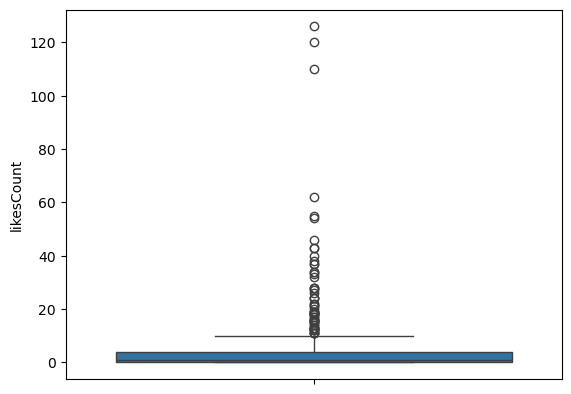

In [15]:
import seaborn as sns
sns.boxplot(data.likesCount)

In [16]:
!pip install feature_engine

<Axes: ylabel='likesCount'>

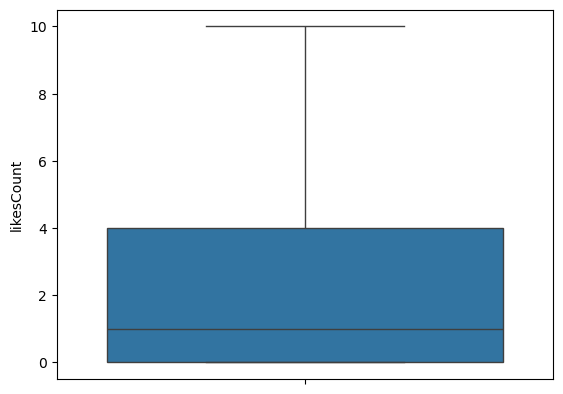

In [17]:
from feature_engine.outliers import Winsorizer
Winsorization = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ['likesCount'])
x = Winsorization.fit_transform(data[['likesCount']])
sns.boxplot(x.likesCount)

In [18]:
Q1 = data['commentsCount'].quantile(0.25)
Q3 = data['commentsCount'].quantile(0.75)
IQR = Q3 - Q1
print("Q1 values:", Q1)
print("Q3 values:", Q3)
print("IQR values:", IQR)

Q1 values: 5.0
Q3 values: 8.69672131147541
IQR values: 3.696721311475409


In [19]:
lower_limit = Q1 - 1.5 * (IQR)
upper_limit = Q3 + 1.5 * (IQR)
print(lower_limit)
print(upper_limit)

-0.5450819672131137
14.241803278688522


In [20]:
outliers = np.where((data['commentsCount'] > upper_limit) | (data['commentsCount'] < lower_limit))
outliers
outliers = ((data['commentsCount'] > upper_limit) | (data['commentsCount'] < lower_limit)).sum()
outliers

38

<Axes: ylabel='commentsCount'>

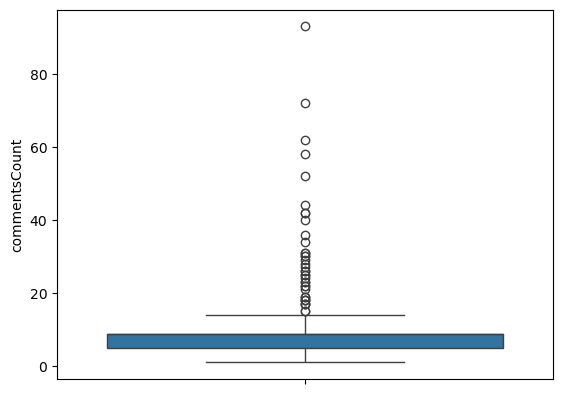

In [21]:
import seaborn as sns
sns.boxplot(data.commentsCount)

<Axes: ylabel='commentsCount'>

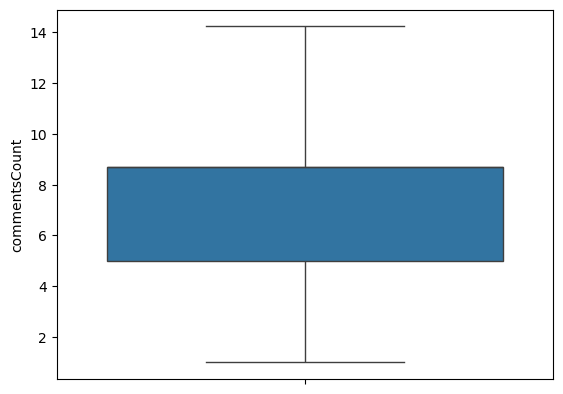

In [22]:
from feature_engine.outliers import Winsorizer
Winsorization = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = ['commentsCount'])
x = Winsorization.fit_transform(data[['commentsCount']])
sns.boxplot(x.commentsCount)

In [23]:
data.describe()


,likesCount,commentsCount
count,522.000000,522.000000
mean,4.720307,8.696721
std,12.053556,8.377096
min,0.000000,1.000000
25%,0.000000,5.000000
50%,1.000000,8.696721
75%,4.000000,8.696721
max,126.000000,93.000000


<Axes: >

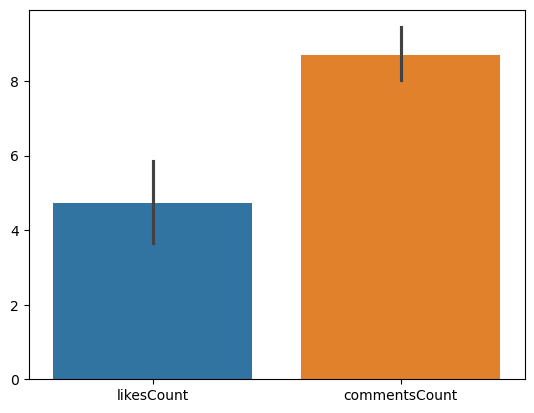

In [24]:
sns.barplot(data)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()
df = AV.AutoViz(r"H:\My Drive\Intership Docs\Climate_NASA\climate_nasa.csv")
plt.show()

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (522, 5)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  1
    Number of Integer-Categorical Columns =  1
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  2
    Number of D

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
date,object,0.000000,100,,,Possible ID column: drop before modeling step.
likesCount,int64,0.000000,7,0.000000,126.000000,Column has 65 outliers greater than upper bound (10.00) or lower than lower bound(-6.00). Cap them or remove them.
profileName,object,0.000000,92,,,No issue
commentsCount,float64,53.256705,NA,1.000000,93.000000,"278 missing values. Impute them with mean, median, mode, or a constant value such as 123., Column has 25 outliers greater than upper bound (22.00) or lower than lower bound(-10.00). Cap them or remove them."
text,object,3.448276,96,,,"18 missing values. Impute them with mean, median, mode, or a constant value such as 123., Mixed dtypes: has 2 different data types: object, float,"


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\gurra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\gurra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\gurra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\gurra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\gurra\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

Could not draw wordcloud plot for profileName. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

Could not draw wordcloud plot for text. 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.

All Plots done
Time to run AutoViz = 2 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [61]:
data.to_csv('cleaned_data.csv', index=False)


In [27]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


In [28]:
import sweetviz as sv
import pandas as pd

In [29]:
report = sv.analyze(data)
report.show_html("sweetviz_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
